In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVC

# Inicjalizacja klasyfikatora
clf = SVC(kernel='linear')

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  # or any other classifier

def evaluate_feature_set(X, y, features):
    """
    Evaluate a feature set using cross-validation
    
    Parameters:
    X : DataFrame or array
        The full feature matrix
    y : array
        Target values
    features : list
        List of selected feature indices or names
    
    Returns:
    float : Average cross-validation score
    """
    # Select only the specified features
    X_selected = X[:, features] if isinstance(X, np.ndarray) else X[features]
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)
    
    # Initialize classifier
    classifier = SVC(kernel='linear')
    
    # Perform cross-validation
    scores = cross_val_score(
        classifier,
        X_scaled,
        y,
        cv=5,  # 5-fold cross-validation
        scoring='accuracy'  # or 'f1', 'precision', 'recall', etc.
    )
    
    return np.mean(scores)

In [3]:
def sequential_forward_selection(features, target, max_features):
    selected_features = []
    remaining_features = list(features)
    
    while len(selected_features) < max_features:
        best_score = 0
        best_feature = None
        
        # Testowanie każdej pozostałej cechy
        for feature in remaining_features:
            current_features = selected_features + [feature]
            # Obliczenie jakości klasyfikacji dla obecnego zestawu cech
            score = evaluate_feature_set(current_features, target)
            
            if score > best_score:
                best_score = score
                best_feature = feature
        
        if best_feature:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            
    return selected_features

In [4]:
def sequential_backward_selection(features, target, min_features):
    selected_features = list(features)
    
    while len(selected_features) > min_features:
        worst_score = float('inf')
        worst_feature = None
        
        # Testowanie usunięcia każdej cechy
        for feature in selected_features:
            current_features = [f for f in selected_features if f != feature]
            # Obliczenie jakości klasyfikacji bez danej cechy
            score = evaluate_feature_set(current_features, target)
            
            if score < worst_score:
                worst_score = score
                worst_feature = feature
                
        if worst_feature:
            selected_features.remove(worst_feature)
            
    return selected_features

In [6]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generowanie przykładowych danych
X, y = make_classification(
    n_samples=100,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

# Standaryzacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inicjalizacja klasyfikatora
clf = SVC(kernel='linear', random_state=42)

# Selekcja cech
sfs = SequentialFeatureSelector(
    clf,
    n_features_to_select=5,
    direction='forward',
    scoring='accuracy',
    cv=5
)

# Dopasowanie i transformacja
X_selected = sfs.fit_transform(X_scaled, y)

# Wyświetlenie wyników
selected_features = sfs.get_support()
selected_feature_indices = np.where(selected_features)[0]

print("Liczba wybranych cech:", X_selected.shape[1])
print("Indeksy wybranych cech:", selected_feature_indices)

# Ocena wyników na wybranych cechach
scores = cross_val_score(clf, X_selected, y, cv=5)
print("Średnia dokładność:", scores.mean())
print("Odchylenie standardowe:", scores.std())

Liczba wybranych cech: 5
Indeksy wybranych cech: [ 0  6 10 14 15]
Średnia dokładność: 0.8099999999999999
Odchylenie standardowe: 0.09695359714832658


In [7]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generowanie przykładowych danych
X, y = make_classification(
    n_samples=100,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

# Standaryzacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inicjalizacja klasyfikatora
clf = SVC(kernel='linear', random_state=42)

# Selekcja cech
sfs = SequentialFeatureSelector(
    clf,
    n_features_to_select=5,
    direction='forward',
    scoring='accuracy',
    cv=5
)

# Dopasowanie i transformacja
X_selected = sfs.fit_transform(X_scaled, y)

# Wyświetlenie wyników
selected_features = sfs.get_support()
selected_feature_indices = np.where(selected_features)[0]

print("Liczba wybranych cech:", X_selected.shape[1])
print("Indeksy wybranych cech:", selected_feature_indices)

# Ocena wyników na wybranych cechach
scores = cross_val_score(clf, X_selected, y, cv=5)
print("Średnia dokładność:", scores.mean())
print("Odchylenie standardowe:", scores.std())

Liczba wybranych cech: 5
Indeksy wybranych cech: [ 0  6 10 14 15]
Średnia dokładność: 0.8099999999999999
Odchylenie standardowe: 0.09695359714832658


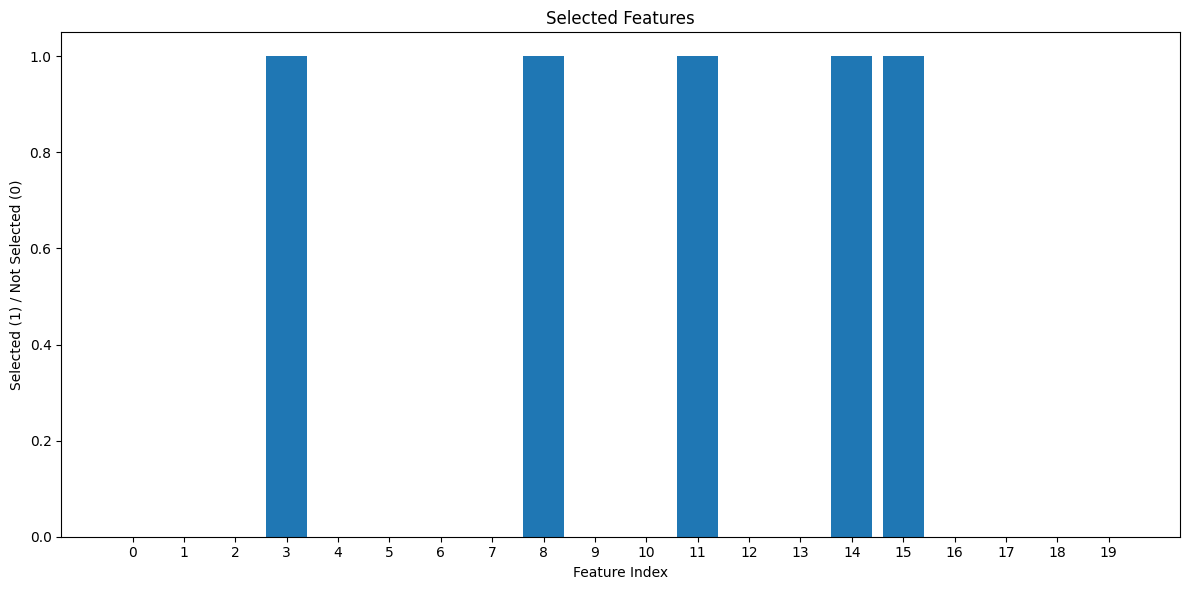

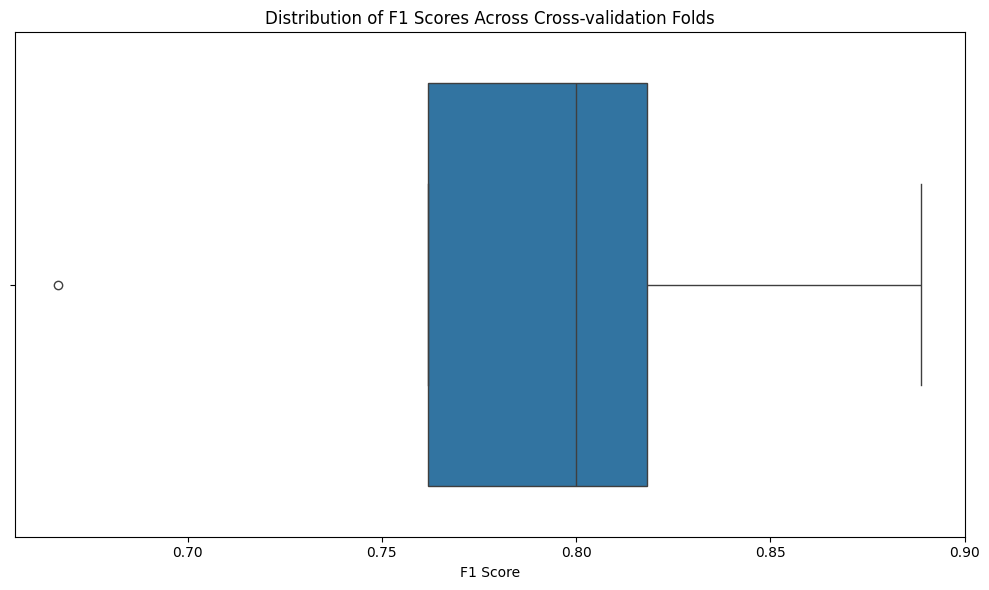

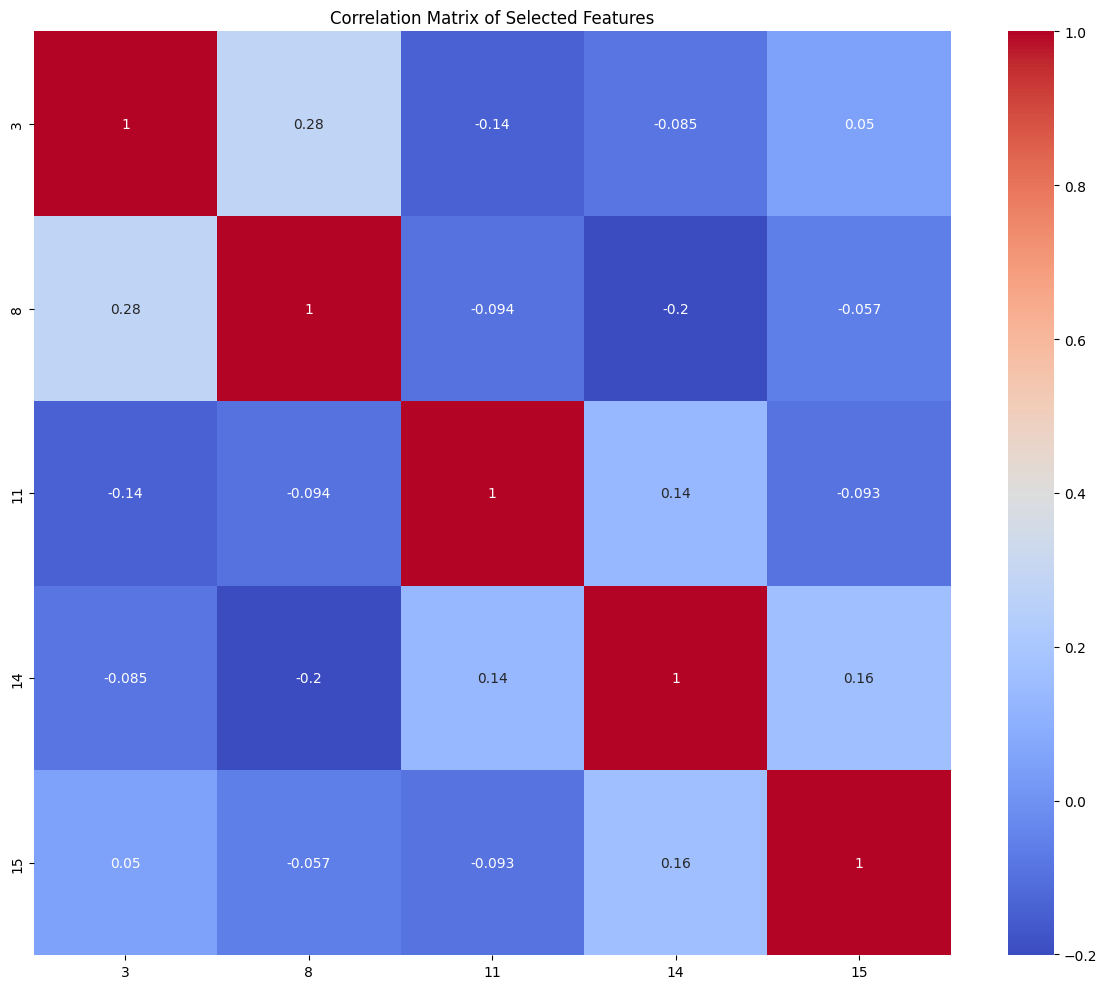

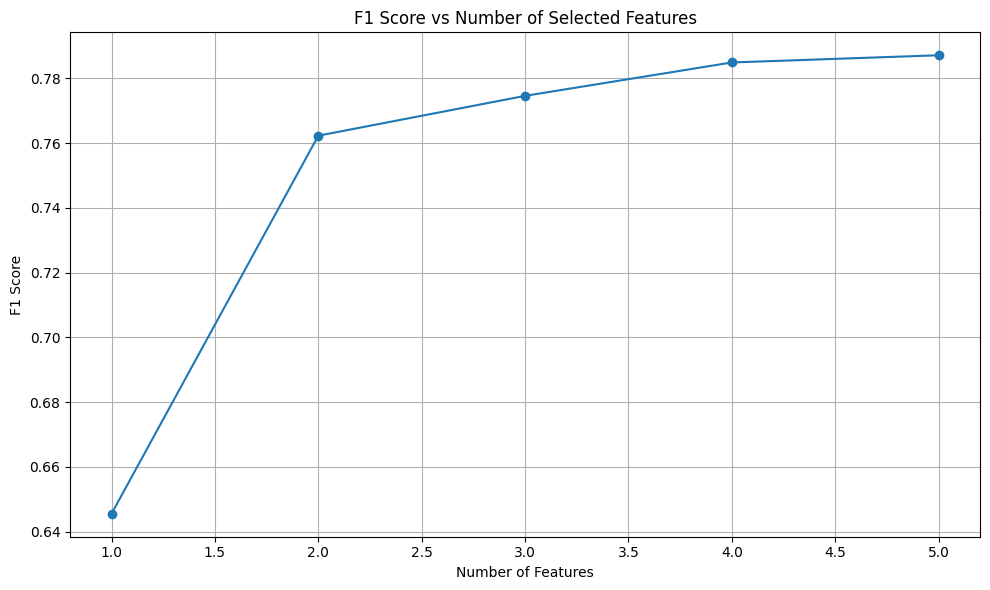

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Generate example data
X, y = make_classification(
    n_samples=100,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize classifier
clf = SVC(kernel='linear', random_state=42)

# Feature selection with F1 score
sfs = SequentialFeatureSelector(
    clf,
    n_features_to_select=5,
    direction='forward',
    scoring='f1',
    cv=5
)

# Fit and transform
X_selected = sfs.fit_transform(X_scaled, y)

# Get selected features
selected_features = sfs.get_support()
selected_feature_indices = np.where(selected_features)[0]

# 1. Feature Importance Plot
plt.figure(figsize=(12, 6))
feature_importance = np.zeros(X.shape[1])
feature_importance[selected_feature_indices] = 1
plt.bar(range(X.shape[1]), feature_importance)
plt.title('Selected Features')
plt.xlabel('Feature Index')
plt.ylabel('Selected (1) / Not Selected (0)')
plt.xticks(range(X.shape[1]))
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# 2. Cross-validation Scores Distribution
scores = cross_val_score(clf, X_selected, y, cv=5, scoring='f1')
plt.figure(figsize=(10, 6))
sns.boxplot(x=scores)
plt.title('Distribution of F1 Scores Across Cross-validation Folds')
plt.xlabel('F1 Score')
plt.tight_layout()
plt.savefig('cv_scores_distribution.png')
plt.show()

# 3. Feature Correlation Heatmap
plt.figure(figsize=(12, 10))
selected_features_data = X_scaled[:, selected_feature_indices]
correlation_matrix = np.corrcoef(selected_features_data.T)
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm',
            xticklabels=selected_feature_indices,
            yticklabels=selected_feature_indices)
plt.title('Correlation Matrix of Selected Features')
plt.tight_layout()
plt.savefig('feature_correlation.png')
plt.show()

# 4. Feature Selection Progress
n_features_range = range(1, len(selected_feature_indices) + 1)
scores_progress = []
for n in n_features_range:
    sfs_n = SequentialFeatureSelector(
        clf,
        n_features_to_select=n,
        direction='forward',
        scoring='f1',
        cv=5
    )
    X_selected_n = sfs_n.fit_transform(X_scaled, y)
    scores_n = cross_val_score(clf, X_selected_n, y, cv=5, scoring='f1')
    scores_progress.append(scores_n.mean())

plt.figure(figsize=(10, 6))
plt.plot(n_features_range, scores_progress, marker='o')
plt.title('F1 Score vs Number of Selected Features')
plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.grid(True)
plt.tight_layout()
plt.savefig('feature_selection_progress.png')
plt.show()

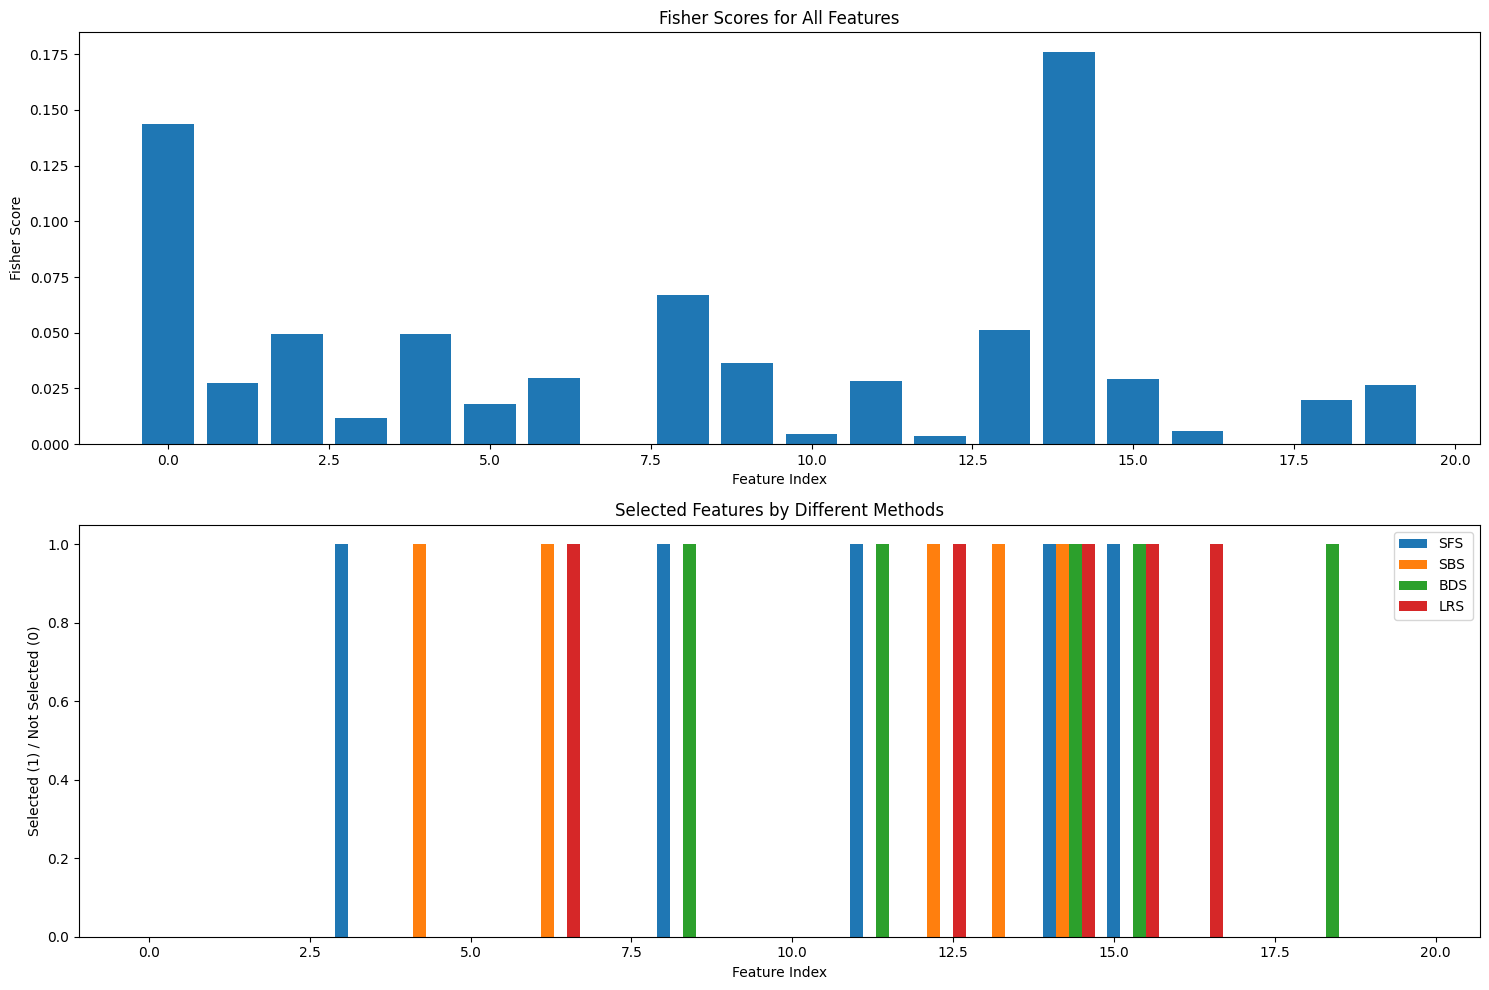


Feature Selection Results:
--------------------------------------------------
Method		Selected Features	Fisher Score Sum
--------------------------------------------------
SFS		[ 3  8 11 14 15]		0.3125
SBS		[ 4  6 12 13 14]		0.3095
BDS		[ 8 11 14 15 18]		0.3208
LRS		[ 6 12 14 15 16]		0.2444


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.svm import SVC
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS_mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SBS_mlxtend

def calculate_fisher_score(X, y):
    """Calculate Fisher score for each feature"""
    classes = np.unique(y)
    n_features = X.shape[1]
    fisher_scores = np.zeros(n_features)
    
    for feature in range(n_features):
        numerator = 0
        denominator = 0
        
        for c in classes:
            class_samples = X[y == c, feature]
            class_mean = np.mean(class_samples)
            class_var = np.var(class_samples)
            total_mean = np.mean(X[:, feature])
            
            numerator += (class_mean - total_mean) ** 2
            denominator += class_var
            
        fisher_scores[feature] = numerator / denominator if denominator != 0 else 0
        
    return fisher_scores

def sequential_forward_selection(X, y, n_features, clf):
    """Sequential Forward Selection"""
    sfs = SequentialFeatureSelector(
        clf,
        n_features_to_select=n_features,
        direction='forward',
        scoring='f1',
        cv=5
    )
    sfs.fit(X, y)
    return sfs.get_support()

def sequential_backward_selection(X, y, n_features, clf):
    """Sequential Backward Selection"""
    sbs = SequentialFeatureSelector(
        clf,
        n_features_to_select=n_features,
        direction='backward',
        scoring='f1',
        cv=5
    )
    sbs.fit(X, y)
    return sbs.get_support()

def bidirectional_selection(X, y, n_features, clf):
    """Bidirectional Selection"""
    bds = SFS_mlxtend(
        clf,
        k_features=n_features,
        forward=True,
        floating=True,
        scoring='f1',
        cv=5
    )
    bds.fit(X, y)
    support = np.zeros(X.shape[1], dtype=bool)
    support[list(bds.k_feature_idx_)] = True
    return support

def lasso_selection(X, y, n_features):
    """Lasso Regression Selection"""
    lasso = LassoCV(cv=5)
    lasso.fit(X, y)
    model = SelectFromModel(lasso, max_features=n_features, prefit=True)
    return model.get_support()

def compare_methods(X, y, n_features=5):
    """Compare different feature selection methods"""
    # Initialize classifier
    clf = SVC(kernel='linear', random_state=42)
    
    # Get feature selection results
    sfs_features = sequential_forward_selection(X, y, n_features, clf)
    sbs_features = sequential_backward_selection(X, y, n_features, clf)
    bds_features = bidirectional_selection(X, y, n_features, clf)
    lrs_features = lasso_selection(X, y, n_features)
    
    # Calculate Fisher scores
    fisher_scores = calculate_fisher_score(X, y)
    
    # Plot comparison
    plt.figure(figsize=(15, 10))
    
    # Plot Fisher scores
    plt.subplot(2, 1, 1)
    plt.bar(range(len(fisher_scores)), fisher_scores)
    plt.title('Fisher Scores for All Features')
    plt.xlabel('Feature Index')
    plt.ylabel('Fisher Score')
    
    # Plot selected features
    plt.subplot(2, 1, 2)
    methods = ['SFS', 'SBS', 'BDS', 'LRS']
    features = [sfs_features, sbs_features, bds_features, lrs_features]
    
    for i, (method, selected) in enumerate(zip(methods, features)):
        plt.bar(np.arange(len(selected)) + i*0.2, selected, width=0.2, label=method)
    
    plt.title('Selected Features by Different Methods')
    plt.xlabel('Feature Index')
    plt.ylabel('Selected (1) / Not Selected (0)')
    plt.legend()
    plt.tight_layout()
    plt.savefig('feature_selection_comparison.png')
    plt.show()
    
    # Print comparison results
    print("\nFeature Selection Results:")
    print("-" * 50)
    print("Method\t\tSelected Features\tFisher Score Sum")
    print("-" * 50)
    
    for method, selected in zip(methods, features):
        selected_indices = np.where(selected)[0]
        fisher_sum = np.sum(fisher_scores[selected])
        print(f"{method}\t\t{selected_indices}\t\t{fisher_sum:.4f}")
    
    return {
        'SFS': sfs_features,
        'SBS': sbs_features,
        'BDS': bds_features,
        'LRS': lrs_features,
        'Fisher_Scores': fisher_scores
    }

# Generate example data
X, y = make_classification(
    n_samples=100,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compare methods
results = compare_methods(X_scaled, y, n_features=5)

Generowanie danych...

Wykonywanie selekcji sekwencyjnej w przód...
Wykonywanie selekcji sekwencyjnej wstecz...
Obliczanie F-score...


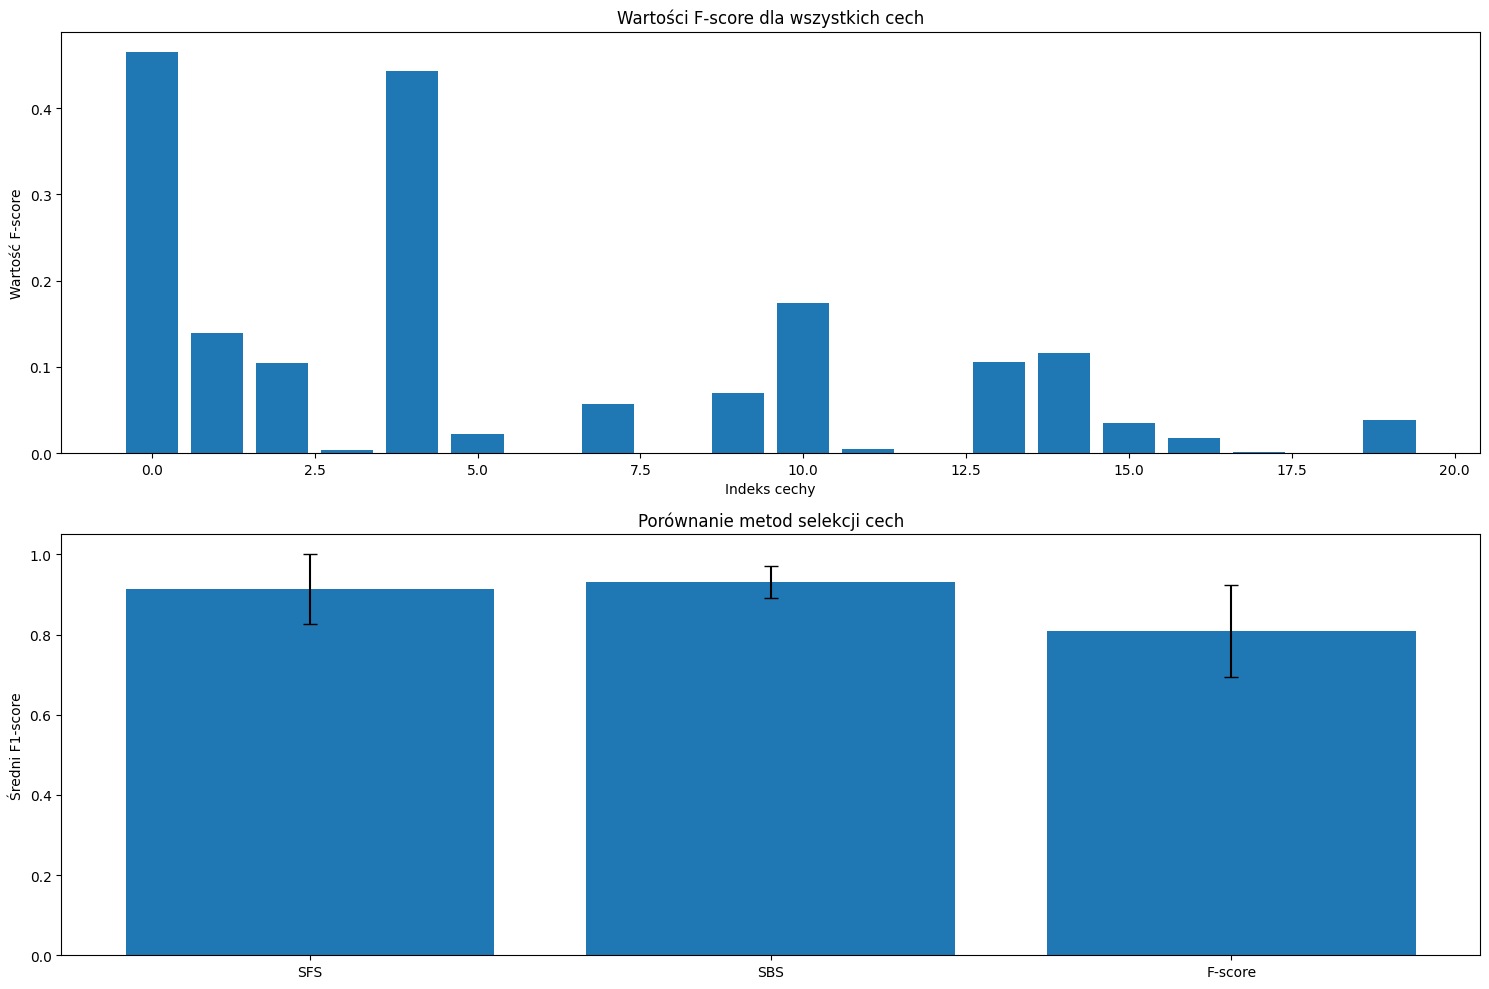


Wyniki selekcji cech:
------------------------------------------------------------
Metoda		Wybrane cechy		Średni F1-score ± std
------------------------------------------------------------
SFS		[ 1  4  6  7 13]		0.913 ± 0.087
SBS		[ 2  4 10 12 13]		0.932 ± 0.040
F-score		[ 0  4 10  1 14]		0.809 ± 0.114


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

def oblicz_f_score(X, y):
    """
    Oblicza wartość F-score dla każdej cechy
    
    Parametry:
    X : array-like o kształcie (n_próbek, n_cech)
        Macierz cech
    y : array-like o kształcie (n_próbek,)
        Etykiety klas (zakładamy 2 klasy)
    
    Zwraca:
    array : Wartości F-score dla każdej cechy
    """
    klasy = np.unique(y)
    n_cech = X.shape[1]
    f_scores = np.zeros(n_cech)
    
    for cecha in range(n_cech):
        licznik = 0
        mianownik = 0
        
        # Obliczanie średniej i wariancji dla całej cechy
        srednia_calosc = np.mean(X[:, cecha])
        
        for klasa in klasy:
            # Dane dla danej klasy
            dane_klasy = X[y == klasa, cecha]
            srednia_klasy = np.mean(dane_klasy)
            wariancja_klasy = np.var(dane_klasy)
            
            # Aktualizacja licznika i mianownika
            licznik += len(dane_klasy) * (srednia_klasy - srednia_calosc) ** 2
            mianownik += len(dane_klasy) * wariancja_klasy
        
        # Obliczenie F-score dla cechy
        f_scores[cecha] = licznik / mianownik if mianownik != 0 else 0
        
    return f_scores

def selekcja_sekwencyjna(X, y, n_cech, kierunek='forward'):
    """
    Wykonuje sekwencyjną selekcję cech
    
    Parametry:
    X : array-like
        Macierz cech
    y : array-like
        Etykiety klas
    n_cech : int
        Liczba cech do wybrania
    kierunek : str
        'forward' dla selekcji w przód, 'backward' dla selekcji wstecz
    
    Zwraca:
    array : Indeksy wybranych cech
    """
    # Inicjalizacja klasyfikatora SVM
    clf = SVC(kernel='linear', random_state=42)
    
    # Inicjalizacja selektora cech
    sfs = SequentialFeatureSelector(
        clf,
        n_features_to_select=n_cech,
        direction=kierunek,
        scoring='f1',
        cv=5
    )
    
    # Dopasowanie selektora
    sfs.fit(X, y)
    
    return np.where(sfs.get_support())[0]

def porownaj_metody_selekcji(X, y, n_cech=5):
    """
    Porównuje różne metody selekcji cech
    """
    # Standaryzacja danych
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Selekcja sekwencyjna w przód
    print("\nWykonywanie selekcji sekwencyjnej w przód...")
    sfs_indeksy = selekcja_sekwencyjna(X_scaled, y, n_cech, 'forward')
    
    # Selekcja sekwencyjna wstecz
    print("Wykonywanie selekcji sekwencyjnej wstecz...")
    sbs_indeksy = selekcja_sekwencyjna(X_scaled, y, n_cech, 'backward')
    
    # Selekcja na podstawie F-score
    print("Obliczanie F-score...")
    f_scores = oblicz_f_score(X_scaled, y)
    fscore_indeksy = np.argsort(f_scores)[::-1][:n_cech]
    
    # Ocena wyników za pomocą walidacji krzyżowej
    clf = SVC(kernel='linear', random_state=42)
    
    wyniki = {}
    for nazwa, indeksy in [('SFS', sfs_indeksy), 
                          ('SBS', sbs_indeksy), 
                          ('F-score', fscore_indeksy)]:
        scores = cross_val_score(clf, X_scaled[:, indeksy], y, 
                               cv=5, scoring='f1')
        wyniki[nazwa] = {
            'indeksy': indeksy,
            'sredni_f1': np.mean(scores),
            'std_f1': np.std(scores)
        }
    
    # Wizualizacja wyników
    plt.figure(figsize=(15, 10))
    
    # Wykres F-scores
    plt.subplot(2, 1, 1)
    plt.bar(range(len(f_scores)), f_scores)
    plt.title('Wartości F-score dla wszystkich cech')
    plt.xlabel('Indeks cechy')
    plt.ylabel('Wartość F-score')
    
    # Wykres porównawczy wybranych cech
    plt.subplot(2, 1, 2)
    x = np.arange(3)
    srednie = [wyniki[m]['sredni_f1'] for m in ['SFS', 'SBS', 'F-score']]
    std = [wyniki[m]['std_f1'] for m in ['SFS', 'SBS', 'F-score']]
    
    plt.bar(x, srednie, yerr=std, capsize=5)
    plt.xticks(x, ['SFS', 'SBS', 'F-score'])
    plt.title('Porównanie metod selekcji cech')
    plt.ylabel('Średni F1-score')
    
    plt.tight_layout()
    # plt.savefig('porownanie_metod_selekcji.png')
    plt.show()
    
    # Wyświetlenie wyników
    print("\nWyniki selekcji cech:")
    print("-" * 60)
    print("Metoda\t\tWybrane cechy\t\tŚredni F1-score ± std")
    print("-" * 60)
    
    for nazwa in ['SFS', 'SBS', 'F-score']:
        print(f"{nazwa}\t\t{wyniki[nazwa]['indeksy']}\t\t"
              f"{wyniki[nazwa]['sredni_f1']:.3f} ± {wyniki[nazwa]['std_f1']:.3f}")
    
    return wyniki

# Generowanie przykładowych danych
print("Generowanie danych...")
X, y = make_classification(
    n_samples=100,    # liczba próbek
    n_features=20,    # liczba cech
    n_informative=10, # liczba informatywnych cech
    n_redundant=5,    # liczba redundantnych cech
    n_classes=2,      # liczba klas
    random_state=42
)

# Porównanie metod
wyniki = porownaj_metody_selekcji(X, y, n_cech=5) 

Generowanie danych...

Wykonywanie selekcji sekwencyjnej w przód...
Wykonywanie selekcji sekwencyjnej wstecz...
Obliczanie F-score...


/var/folders/1_/66rx6f8n4m1b1s04jbkxdlrh0000gn/T/ipykernel_60459/3504701091.py:123: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=['SFS', 'SBS', 'F-score'])


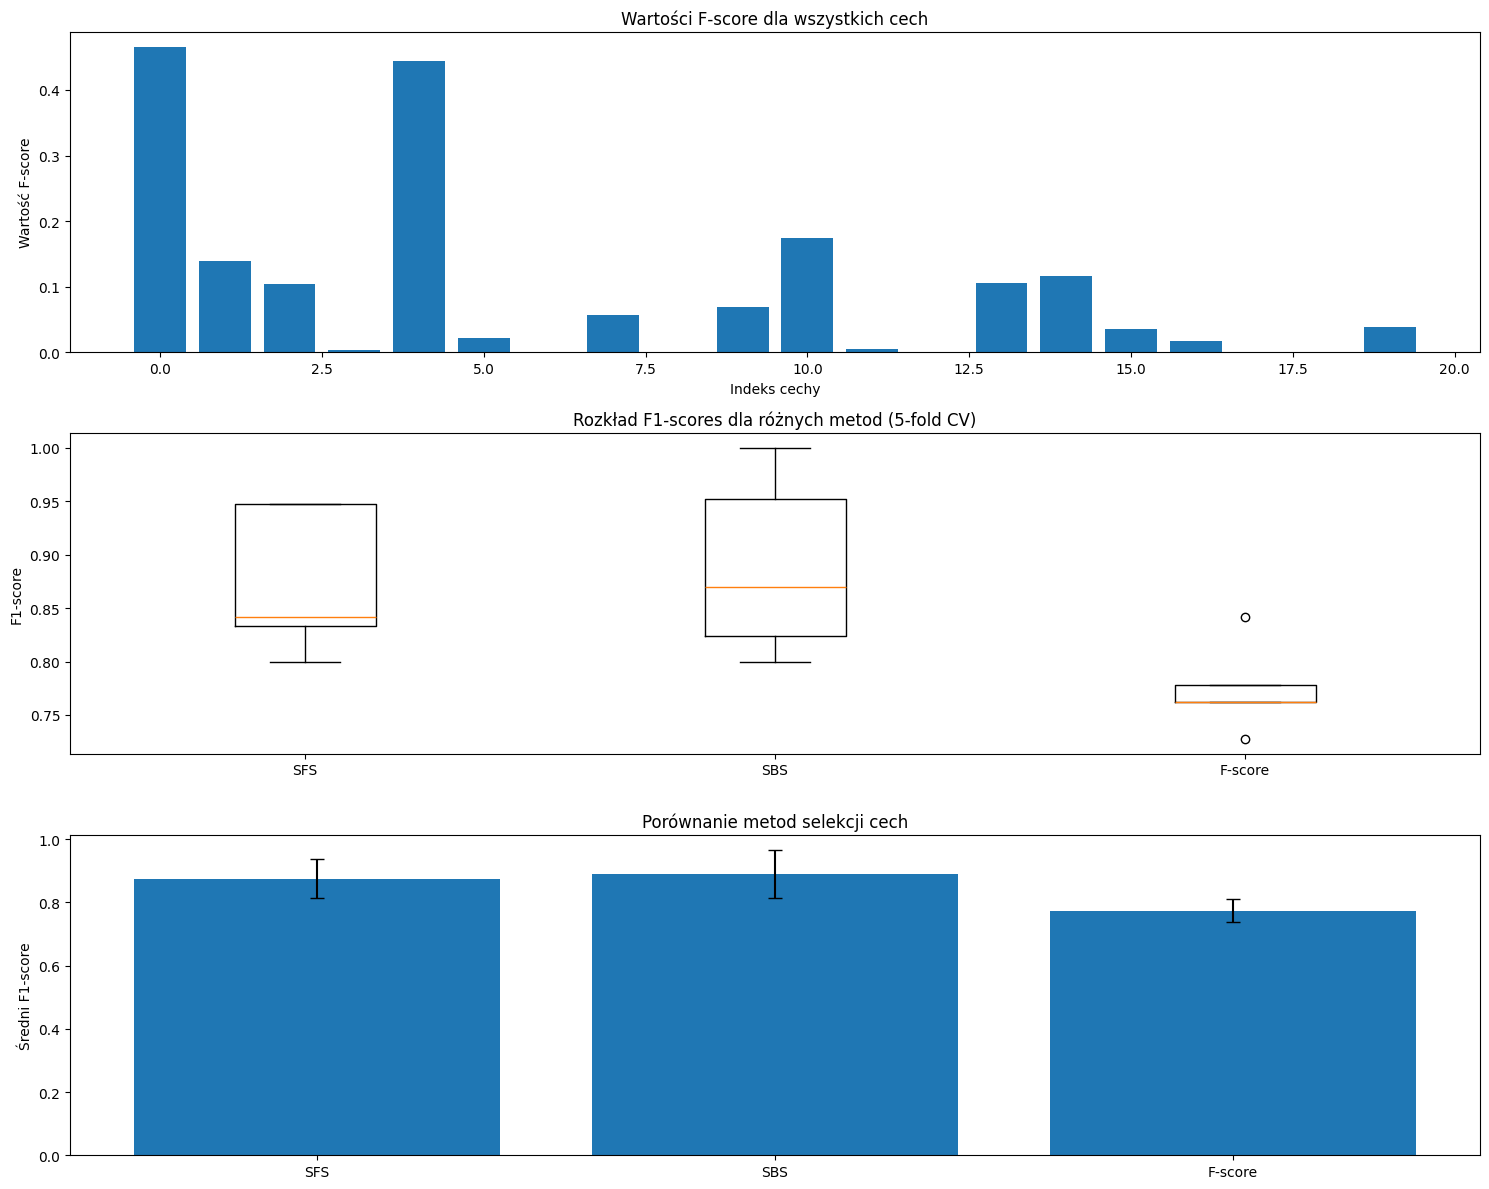


Wyniki selekcji cech z 5-krotną walidacją krzyżową:
----------------------------------------------------------------------
Metoda		Wybrane cechy		F1-score (średnia ± std)		Wyniki dla foldów
----------------------------------------------------------------------
SFS		[ 0  1  5  8 14]		0.874 ± 0.062		[0.84210526 0.83333333 0.8        0.94736842 0.94736842]
SBS		[ 4  6 13 15 16]		0.889 ± 0.076		[0.86956522 0.8        0.95238095 1.         0.82352941]
F-score		[ 0  4 10  1 14]		0.774 ± 0.038		[0.76190476 0.76190476 0.72727273 0.77777778 0.84210526]


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import make_scorer, f1_score
import pandas as pd

def oblicz_f_score(X, y):
    """
    Oblicza wartość F-score dla każdej cechy
    """
    klasy = np.unique(y)
    n_cech = X.shape[1]
    f_scores = np.zeros(n_cech)
    
    for cecha in range(n_cech):
        licznik = 0
        mianownik = 0
        srednia_calosc = np.mean(X[:, cecha])
        
        for klasa in klasy:
            dane_klasy = X[y == klasa, cecha]
            srednia_klasy = np.mean(dane_klasy)
            wariancja_klasy = np.var(dane_klasy)
            
            licznik += len(dane_klasy) * (srednia_klasy - srednia_calosc) ** 2
            mianownik += len(dane_klasy) * wariancja_klasy
        
        f_scores[cecha] = licznik / mianownik if mianownik != 0 else 0
        
    return f_scores

def selekcja_sekwencyjna_cv(X, y, n_cech, kierunek='forward', n_splits=5):
    """
    Wykonuje sekwencyjną selekcję cech z walidacją krzyżową
    """
    # Inicjalizacja klasyfikatora SVM
    clf = SVC(kernel='linear', random_state=42)
    
    # Inicjalizacja walidacji krzyżowej ze stratyfikacją
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Inicjalizacja selektora cech
    sfs = SequentialFeatureSelector(
        clf,
        n_features_to_select=n_cech,
        direction=kierunek,
        scoring='f1',
        cv=cv,  # Używamy zdefiniowanego obiektu cv
        n_jobs=-1  # Wykorzystanie wszystkich dostępnych rdzeni
    )
    
    # Dopasowanie selektora
    sfs.fit(X, y)
    
    return np.where(sfs.get_support())[0]

def ocen_cechy_cv(X, y, wybrane_cechy, n_splits=5):
    """
    Ocenia wybrane cechy używając walidacji krzyżowej
    """
    clf = SVC(kernel='linear', random_state=42)
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Używamy tylko wybranych cech
    X_selected = X[:, wybrane_cechy]
    
    # Obliczamy wyniki dla każdego foldu
    scores = cross_val_score(clf, X_selected, y, cv=cv, scoring='f1')
    
    return scores

def porownaj_metody_selekcji(X, y, n_cech=5, n_splits=5):
    """
    Porównuje różne metody selekcji cech używając walidacji krzyżowej
    """
    # Standaryzacja danych
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Selekcja sekwencyjna w przód z CV
    print("\nWykonywanie selekcji sekwencyjnej w przód...")
    sfs_indeksy = selekcja_sekwencyjna_cv(X_scaled, y, n_cech, 'forward', n_splits)
    
    # Selekcja sekwencyjna wstecz z CV
    print("Wykonywanie selekcji sekwencyjnej wstecz...")
    sbs_indeksy = selekcja_sekwencyjna_cv(X_scaled, y, n_cech, 'backward', n_splits)
    
    # Selekcja na podstawie F-score
    print("Obliczanie F-score...")
    f_scores = oblicz_f_score(X_scaled, y)
    fscore_indeksy = np.argsort(f_scores)[::-1][:n_cech]
    
    # Ocena wyników dla każdej metody
    wyniki = {}
    for nazwa, indeksy in [('SFS', sfs_indeksy), 
                          ('SBS', sbs_indeksy), 
                          ('F-score', fscore_indeksy)]:
        scores = ocen_cechy_cv(X_scaled, y, indeksy, n_splits)
        wyniki[nazwa] = {
            'indeksy': indeksy,
            'wyniki_foldow': scores,
            'sredni_f1': np.mean(scores),
            'std_f1': np.std(scores)
        }
    
    # Wizualizacja wyników
    plt.figure(figsize=(15, 12))
    
    # Wykres F-scores
    plt.subplot(3, 1, 1)
    plt.bar(range(len(f_scores)), f_scores)
    plt.title('Wartości F-score dla wszystkich cech')
    plt.xlabel('Indeks cechy')
    plt.ylabel('Wartość F-score')
    
    # Wykres porównawczy metod (boxplot)
    plt.subplot(3, 1, 2)
    boxplot_data = [wyniki[m]['wyniki_foldow'] for m in ['SFS', 'SBS', 'F-score']]
    plt.boxplot(boxplot_data, labels=['SFS', 'SBS', 'F-score'])
    plt.title(f'Rozkład F1-scores dla różnych metod ({n_splits}-fold CV)')
    plt.ylabel('F1-score')
    
    # Wykres słupkowy średnich wyników
    plt.subplot(3, 1, 3)
    x = np.arange(3)
    srednie = [wyniki[m]['sredni_f1'] for m in ['SFS', 'SBS', 'F-score']]
    std = [wyniki[m]['std_f1'] for m in ['SFS', 'SBS', 'F-score']]
    
    plt.bar(x, srednie, yerr=std, capsize=5)
    plt.xticks(x, ['SFS', 'SBS', 'F-score'])
    plt.title('Porównanie metod selekcji cech')
    plt.ylabel('Średni F1-score')
    
    plt.tight_layout()
    # plt.savefig('porownanie_metod_selekcji_cv.png')
    plt.show()
    
    # Wyświetlenie szczegółowych wyników
    print("\nWyniki selekcji cech z {}-krotną walidacją krzyżową:".format(n_splits))
    print("-" * 70)
    print("Metoda\t\tWybrane cechy\t\tF1-score (średnia ± std)\t\tWyniki dla foldów")
    print("-" * 70)
    
    for nazwa in ['SFS', 'SBS', 'F-score']:
        print(f"{nazwa}\t\t{wyniki[nazwa]['indeksy']}\t\t"
              f"{wyniki[nazwa]['sredni_f1']:.3f} ± {wyniki[nazwa]['std_f1']:.3f}\t\t"
              f"{wyniki[nazwa]['wyniki_foldow']}")
    
    return wyniki

# Generowanie przykładowych danych
print("Generowanie danych...")
X, y = make_classification(
    n_samples=100,    # liczba próbek
    n_features=20,    # liczba cech
    n_informative=10, # liczba informatywnych cech
    n_redundant=5,    # liczba redundantnych cech
    n_classes=2,      # liczba klas
    random_state=42
)

#
# Porównanie metod z 5-krotną walidacją krzyżową

wyniki =  porownaj_metody_selekcji(X, y, n_cech=int(5), n_splits=int(5))

In [59]:
print("Wczytywanie danych z pliku Peptidome2_240.txt...")
data = pd.read_csv('/Users/annakosycarz/Desktop/POLITECHNIKA/machine learning for bioinf/UMB-selekcja-cech/Peptidome2/Peptidome2_240.txt', sep='\t')  # używamy pełnej ścieżki do pliku
# Drop rows with missing values in both X and y to ensure no NaN values
data = data.dropna(axis=0, how='any')  # Remove any rows with missing values
data = data.sample(n=min(200, data.shape[1]), axis=1, random_state=42, replace=True)
data = data.dropna(subset=[data.columns[-1]])  # Remove rows with missing values in target column
# Przygotowanie danych
X = data.iloc[:, :-1].values  # wszystkie kolumny oprócz ostatniej
y = data.iloc[:, -1].map({'#Chory': 0, '#Zdrowi': 1})  # konwersja etykiet na wartości numeryczne
y = y.values  # konwersja na tablicę numpy

print(X)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(X).apply(pd.to_numeric, errors='coerce').values
X = scaler.fit_transform(X)

y = y - 1

Wczytywanie danych z pliku Peptidome2_240.txt...
[[2.      2.      1.      ... 2.      1.      1.     ]
 [5.0026  5.35691 4.7195  ... 5.0026  4.42568 5.08796]
 [4.98381 5.50595 4.70845 ... 4.98381 4.94608 5.24094]
 ...
 [5.49224 5.47156 5.9591  ... 5.49224 6.16165 5.63794]
 [5.57835 6.07854 6.06221 ... 5.57835 5.96419 6.19676]
 [6.8066  6.96734 6.55262 ... 6.8066  6.10591 6.56827]]


In [60]:
wyniki =  porownaj_metody_selekcji(X, y, n_cech=int(5), n_splits=int(5))


Wykonywanie selekcji sekwencyjnej w przód...


ValueError: Input y contains NaN.